# ANALYSE DES SIGNAUX REELS DES CAPTEURS

---

In [270]:
from jingle import play_jingle
play_jingle()

ImportError: cannot import name 'play_jingle' from 'jingle' (d:\documents\mines\2a\molonari\molonari1d\pyheatmy\jingle.py)

In [224]:
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import chardet
import csv
import os
import matplotlib.dates as mdates
from IPython.display import Image
from scipy import stats


# Définir ZERO_CELSIUS (conversion Celsius vers Kelvin)
ZERO_CELSIUS = 273.15


chemins de fichiers :

In [225]:
# define the folder path
folder = r'D:\Documents\MINES\2A\MOLONARI\MOLONARI1D\dataAnalysis/'

# read in our data
path_files = folder + 'raw_data/'
path_config= folder + 'configuration/pressure_sensors/'
contenuDossier = os.listdir(path_files)
print(contenuDossier)

['.DS_Store', 'point13_29_07_15', 'point14_29_07_15', 'point15_29_07_15', 'point34_27_06_16', 'point35_07_12_16', 'point36_12_07_16', 'point46_17_06_19', 'point47_27_08_19', 'point48_14_04_18', 'point52_13_10_23', 'point53_13_10_23', 'schema_dispositif_AvAv_23_07_15.png']


In [226]:
point='point35_07_12_16/'
# le chemin vers le dossier
chemin = path_files + point
# Spécifiez le chemin de votre fichier PNG
chemin_image = chemin + point.split('_')[0] + '_schema.png'

fonction utile

In [227]:
def read_csv (chemin_fichier):
    #Detecter separateur
    with open(chemin_fichier, 'r') as file:
        sniffer = csv.Sniffer()
        sample_data = file.read(1024)
        detecter_separateur = (sniffer.sniff(sample_data).delimiter)

    if "Titre" in open(chemin_fichier).readline():
        data_frame = pd.read_csv(chemin_fichier, sep=detecter_separateur, skiprows=1)
    else:
        data_frame = pd.read_csv(chemin_fichier, sep=detecter_separateur)

    return data_frame 

In [228]:
read_csv(chemin + "Point035_info.csv").head()

Point_Name             Point035
0      P_Sensor_Name                 P505
1         Shaft_Name                 S003
2  Implantation_Date  2016/07/12 11:00:00
3          Meas_Date  2016/08/03 11:00:00
4          River_Bed                0.155

Structure de données

In [229]:

# on crée un dictionnaire avec toutes les informations pour chaque point et on met les dictionnaires dans une liste
dico = {}
# le chemin vers le dossier
dico['chemin'] = path_files + point

with open(dico['chemin'] + '/geometrie.txt', 'r') as fichier:
    lignes = fichier.readlines()
    # le nom du capteur
    dico['capteur'] = lignes[1][:4]
    # la profondeur du capteur
    dico['profondeur'] = lignes[3]
    # les profondeurs auxquelles on fait les mesures
    dico['profondeurMesures'] = []
    profMes = lignes[5].split(';')
    for num in profMes :
        dico['profondeurMesures'].append(int(num))


    # on va ensuite mettre les dataframes dans le dictionnaire
contenuDossierPoint = os.listdir(dico['chemin'])
for x in contenuDossierPoint:
    # la pression
    if x=="point35_pression_cleaned.csv":
        dico['pression'] = read_csv(dico['chemin'] + '/' + x)
    # la température
    if x=="point35_temperature_cleaned.csv":
        dico['temperature'] = read_csv(dico['chemin'] + '/' + x)
with open(path_config + dico['capteur'].upper() + '.csv') as fichier:
    lignes = fichier.readlines()
    for l in lignes:
        if l.startswith('Intercept'):
            dico['intercept'] = float(l[10:-2])
        if l.startswith('dU/dH'):
            dico['dU/dH'] = float(l[6:-2])
        if l.startswith('dU/dT'):
            dico['dU/dT'] = float(l[6:-2]) 



In [230]:
# Modifier le format de dates

for i in range(len(dico['temperature'].dates)):
    date=dico['temperature'].dates[i]
    jour=str(date.split(' ')[0]).split('-')
    dico['temperature'].dates[i]=str(jour[0]) + "/" + str(jour[1]) + "/" + str(jour[2]) + " " + str(date.split(' ')[1])

for i in range(len(dico['pression'].dates)):
    date=dico['pression'].dates[i]
    jour=str(date.split(' ')[0]).split('-')
    dico['pression'].dates[i]=str(jour[0]) + "/" + str(jour[1]) + "/" + str(jour[2]) + " " + str(date.split(' ')[1])

C:\Users\mathi\AppData\Local\Temp\ipykernel_9312\2300114659.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dico['temperature'].dates[i]=str(jour[0]) + "/" + str(jour[1]) + "/" + str(jour[2]) + " " + str(date.split(' ')[1])
C:\Users\math

Renommage des colonnes

In [231]:
# Renommage 

dico['temperature'].rename(columns={'Temp., °C (LGR S/N: 10117164, SEN S/N: 10117164)': 'temperature_depth_1_C'   ,    'Temp., °C (LGR S/N: 10117164, SEN S/N: 10117164).1': 'temperature_depth_2_C','Temp., °C (LGR S/N: 10117164, SEN S/N: 10117164).2': 'temperature_depth_3_C','Temp., °C (LGR S/N: 10117164, SEN S/N: 10117164).3': 'temperature_depth_4_C', 'Date Heure, GMT+01:00': 'dates' }, inplace=True)
dico['pression'].rename(columns={'Date Heure, GMT+01:00': 'dates'   ,    'Tension, V (LGR S/N: 10445475, SEN S/N: 10445475, LBL: température)': 'tension_V'   ,   'Temp., °C (LGR S/N: 10445475, SEN S/N: 10445475, LBL: Température)' : 'temperature_stream_C'}, inplace=True)

print("Colonnes température:", dico['temperature'].columns.tolist())
print("Colonnes pression:", dico['pression'].columns.tolist())

Colonnes température: ['dates', 'Temp_profondeur_10', 'Temp_profondeur_20', 'Temp_profondeur_30', 'Temp_profondeur_40']
Colonnes pression: ['dates', 'temperature_stream', 'dH']


Changer le format des dates

In [232]:
def convertDates(df: pd.DataFrame):
    """
    Convert dates from a list of strings by testing several different input formats
    Try all date formats already encountered in data points
    If none of them is OK, try the generic way (None)
    If the generic way doesn't work, this method fails
    (in that case, you should add the new format to the list)
    
    This function works directly on the giving Pandas dataframe (in place)
    This function assumes that the first column of the given Pandas dataframe
    contains the dates as characters string type
    
    For datetime conversion performance, see:
    See https://stackoverflow.com/questions/40881876/python-pandas-convert-datetime-to-timestamp-effectively-through-dt-accessor
    """
    formats = ("%m/%d/%y %H:%M:%S", "%m/%d/%y %I:%M:%S %p",
               "%d/%m/%y %H:%M",    "%d/%m/%y %I:%M %p",
               "%m/%d/%Y %H:%M:%S", "%m/%d/%Y %I:%M:%S %p", 
               "%d/%m/%Y %H:%M",    "%d/%m/%Y %I:%M %p",
               "%y/%m/%d %H:%M:%S", "%y/%m/%d %I:%M:%S %p", 
               "%y/%m/%d %H:%M",    "%y/%m/%d %I:%M %p",
               "%Y/%m/%d %H:%M:%S", "%Y/%m/%d %I:%M:%S %p", 
               "%Y/%m/%d %H:%M",    "%Y/%m/%d %I:%M %p",
               None)
    times = dico['pression'][dico['pression'].columns[0]]
    for f in formats:
        try:
            # Convert strings to datetime objects
            new_times = pd.to_datetime(times, format=f)
            # Convert datetime series to numpy array of integers (timestamps)
            new_ts = new_times.values.astype(np.int64)
            # If times are not ordered, this is not the appropriate format
            test = np.sort(new_ts) - new_ts
            if np.sum(abs(test)) != 0 :
                #print("Order is not the same")
                raise ValueError()
            # Else, the conversion is a success
            #print("Found format ", f)
            df[df.columns[0]] = new_times
            return
        
        except ValueError:
            #print("Format ", f, " not valid")
            continue
    
    # None of the known format are valid
    raise ValueError("Cannot convert dates: No known formats match your data!")

In [233]:
convertDates(dico['temperature'])
convertDates(dico['pression'])
dico['temperature']['dates'].dtype
dico['pression']['dates'].dtype


dtype('<M8[ns]')

Rajout d'une colonne temps écoulé depuis le début et vérifiction que les dates sont dans le bon ordre 

In [234]:
# Triez le DataFrame par la colonne de référence temporelle
# 'inplace=True' modifie le DataFrame directement
dico['temperature'].sort_values(by='dates', inplace=True)

# Important : Si vous avez un index, il est préférable de le réinitialiser après le tri
dico['temperature'].reset_index(drop=True, inplace=True)

# Attention : les doublons nous embetent, on les vire
duplicates = dico['temperature']['dates'].duplicated().sum()

if duplicates > 0:
    print(f"Attention : {duplicates} doublon(s) de date trouvé(s).")
    # Pour la plupart des analyses, supprimer les doublons est la meilleure option
    dico['temperature'].drop_duplicates(subset=['dates'], keep='first', inplace=True)
    dico['temperature'].reset_index(drop=True, inplace=True)
    print("Doublons supprimés. Réessayez le calcul.")

# C'est ici qu'on recalcule la colonne du temps écoulé 
t0 = dico['temperature']['dates'].iloc[0]
dico['temperature']['time_days'] = ((dico['temperature']['dates'] - t0).dt.total_seconds() / (24 * 3600)).round(8)

Suppression des NAN

In [235]:
dico['temperature'] = dico['temperature'].dropna(axis = 0, how = 'any')
dico['pression'] = dico['pression'].dropna(axis = 0, how='any')

In [236]:
dico['temperature'].columns

Index(['dates', 'Temp_profondeur_10', 'Temp_profondeur_20',
       'Temp_profondeur_30', 'Temp_profondeur_40', 'time_days'],
      dtype='object')

Tracé des températures

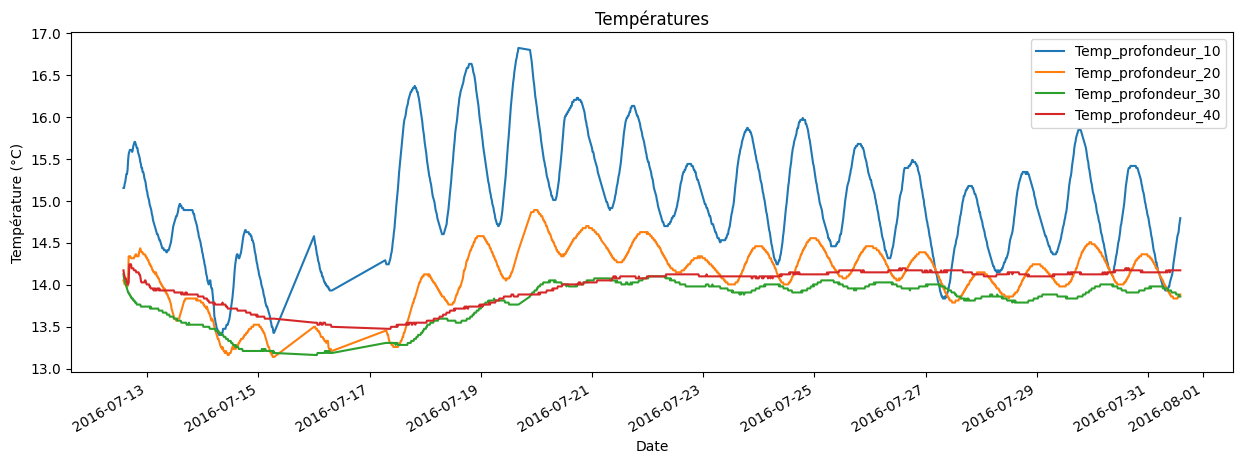

In [237]:
fig, ax = plt.subplots(figsize=(15, 5))

dico['temperature'].plot(x='dates', y=['Temp_profondeur_10', 'Temp_profondeur_20','Temp_profondeur_30', 'Temp_profondeur_40'], ax=ax)

plt.title('Températures')
plt.xlabel('Date')
plt.ylabel('Température (°C)')

plt.show()


---

# Le truc de Noé

In [238]:
dico.keys()

dict_keys(['chemin', 'capteur', 'profondeur', 'profondeurMesures', 'pression', 'temperature', 'intercept', 'dU/dH', 'dU/dT'])

In [239]:
signals = [
    dico['temperature'].Temp_profondeur_10,  
    dico['temperature'].Temp_profondeur_20,  
    dico['temperature'].Temp_profondeur_30,
    dico['temperature'].Temp_profondeur_40  
]

depth_sensors=dico['profondeurMesures']
dt = 15*NSECINMIN # pas de temps en (s)
input_periods_days=[1]

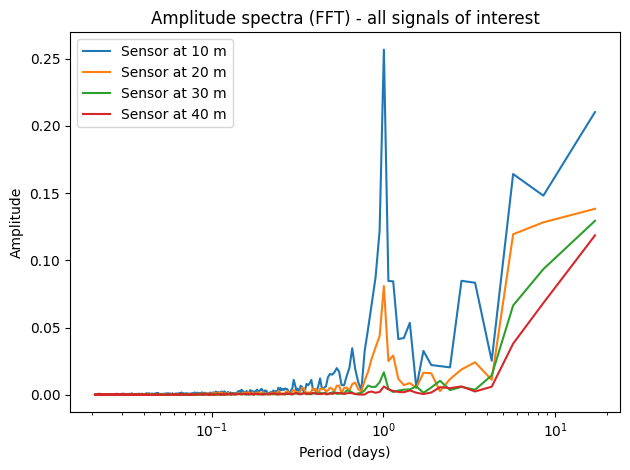

In [240]:
# FFT of the signals of interest on a single plot
sig_arr = np.asarray(signals)           # shape (n_signals, n_time)
n_signals, n_time = sig_arr.shape

freqs = np.fft.rfftfreq(n_time, d=dt)  # cycles per second
mask = freqs > 0
period_days = 1.0 / freqs[mask] / NSECINDAY

plt.figure(figsize=(6.4, 4.8))
cmap = plt.get_cmap("tab10")
for i in range(n_signals):
    y = sig_arr[i].astype(float)
    y -= np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time
    plt.plot(period_days, amp[mask], color=cmap(i % 10), label=f"Sensor at {depth_sensors[i]} m")


plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectra (FFT) - all signals of interest')
plt.legend()
plt.tight_layout()
plt.show()

Now extract the amplitudes at the peaks.

In [241]:
# Create the list of amplitudes for each input period.

amplitudes_at_peaks = []

for i in range(n_signals):
    
    y = sig_arr[i].astype(float)
    y -= np.mean(y)
    yf = np.fft.rfft(y)
    amp = np.abs(yf) / n_time

    phase = np.angle(yf)
    
    # Now find the amplitudes corresponding to the input periods.
    amps_for_signal = []
    for p in input_periods_days:      
        # Find the index of the closest frequency to the input period.
        target_freq = 1.0 / (p * NSECINDAY)
        idx = (np.abs(freqs - target_freq)).argmin()
        amps_for_signal.append(amp[idx])

    amplitudes_at_peaks.append(amps_for_signal)

amplitudes_at_peaks = np.array(amplitudes_at_peaks)  # shape (n_signals, n_input_periods)
print(amplitudes_at_peaks)

[[0.25674256]
 [0.08090495]
 [0.01677865]
 [0.00619806]]


Amplitudes for Sensor at 10 m: [0.25674256]
Amplitudes for Sensor at 20 m: [0.08090495]
Amplitudes for Sensor at 30 m: [0.01677865]
Amplitudes for Sensor at 40 m: [0.00619806]


Text(0, 0.5, 'Amplitude at peak')

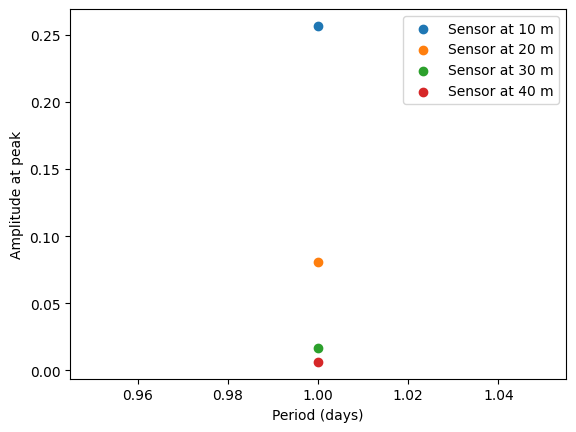

In [242]:
for i in range(n_signals):
    label = f"Sensor at {depth_sensors[i]} m"
    print(f"Amplitudes for {label}: {amplitudes_at_peaks[i]}")

for i in range(n_signals):
    plt.scatter(input_periods_days, amplitudes_at_peaks[i], marker='o', label=(f"Sensor at {depth_sensors[i]} m"))

plt.legend()
plt.xlabel("Period (days)")
plt.ylabel("Amplitude at peak")


--- Analyse de l'amortissement de l'amplitude avec la profondeur ---


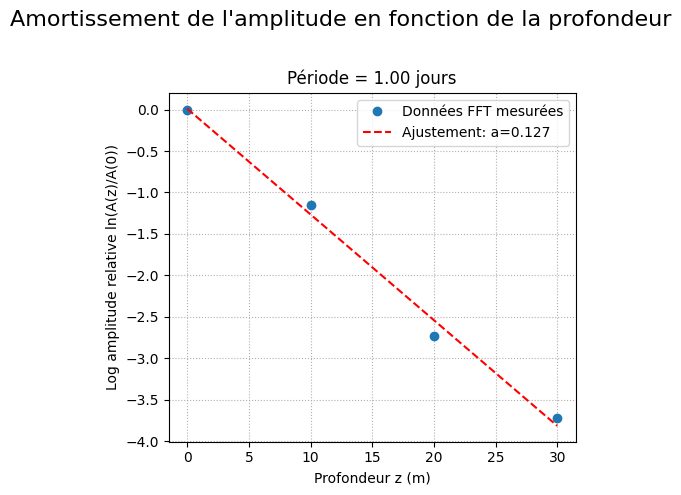

In [243]:
z_values = np.array([0] + depth_sensors[:-1]) 
n_periods = len(input_periods_days)

fig, axs = plt.subplots(1, n_periods, figsize=(5 * n_periods, 5), sharey=False)

# S'il n'y a qu'un seul subplot, axs n'est pas un tableau. On le met dans une liste pour que la boucle fonctionne.
if n_periods == 1:
    axs = [axs]

print("\n--- Analyse de l'amortissement de l'amplitude avec la profondeur ---")

a_values = []

# Boucle sur chaque période de forçage pour créer un subplot
for i, period in enumerate(input_periods_days):
    ax = axs[i] # Sélectionne l'axe du subplot courant

    # Extraire les amplitudes pour cette période
    amplitudes_for_period = amplitudes_at_peaks[:, i]
    
    # Amplitude de la rivière (référence à z=0)
    amplitude_river = amplitudes_for_period[0]
    
    # Calculer l'amplitude relative A(z)/A(0)
    if amplitude_river > 0:
        amplitude_ratio = amplitudes_for_period / amplitude_river
    else:
        # Éviter la division par zéro si l'amplitude de la rivière est nulle
        amplitude_ratio = np.full_like(amplitudes_for_period, np.nan)
    
    log_amplitude_ratio = np.log(amplitude_ratio)


    # Tracer les données "mesurées" (points)
    ax.plot(z_values, log_amplitude_ratio, 'o', label='Données FFT mesurées')

    # Fit ln(A(z)/A(0)) = -az
    if np.all(np.isfinite(log_amplitude_ratio)):
        # Ajustement linéaire pour trouver a
        coeffs = np.polyfit(z_values, log_amplitude_ratio, 1)
        a_fit = -coeffs[0]
        ax.plot(z_values, np.polyval(coeffs, z_values), 'r--', label=f'Ajustement: a={a_fit:.3f}')
        a_values.append(a_fit)

    # Mise en forme du subplot
    ax.set_title(f'Période = {period:.2f} jours')
    ax.set_xlabel('Profondeur z (m)')
    ax.legend()
    ax.grid(True, which='both', linestyle=':')

# Mise en forme globale de la figure
axs[0].set_ylabel('Log amplitude relative ln(A(z)/A(0))') # Label Y uniquement pour le premier graphique
fig.suptitle("Amortissement de l'amplitude en fonction de la profondeur", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajuste pour laisser de la place au titre principal
plt.show()


In [244]:
#dico['temperature']['time_days'].values
#signals
period_days

array([17.09375   ,  8.546875  ,  5.69791667,  4.2734375 ,  3.41875   ,
        2.84895833,  2.44196429,  2.13671875,  1.89930556,  1.709375  ,
        1.55397727,  1.42447917,  1.31490385,  1.22098214,  1.13958333,
        1.06835938,  1.00551471,  0.94965278,  0.89967105,  0.8546875 ,
        0.8139881 ,  0.77698864,  0.74320652,  0.71223958,  0.68375   ,
        0.65745192,  0.63310185,  0.61049107,  0.58943966,  0.56979167,
        0.55141129,  0.53417969,  0.51799242,  0.50275735,  0.48839286,
        0.47482639,  0.46199324,  0.44983553,  0.43830128,  0.42734375,
        0.41692073,  0.40699405,  0.39752907,  0.38849432,  0.37986111,
        0.37160326,  0.36369681,  0.35611979,  0.34885204,  0.341875  ,
        0.33517157,  0.32872596,  0.32252358,  0.31655093,  0.31079545,
        0.30524554,  0.29989035,  0.29471983,  0.28972458,  0.28489583,
        0.28022541,  0.27570565,  0.27132937,  0.26708984,  0.26298077,
        0.25899621,  0.2551306 ,  0.25137868,  0.24773551,  0.24

Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x000001405B2C5800>
Traceback (most recent call last):
  File "c:\Users\mathi\miniconda3\Lib\_weakrefset.py", line 40, in _remove
    self = selfref()
KeyboardInterrupt: 


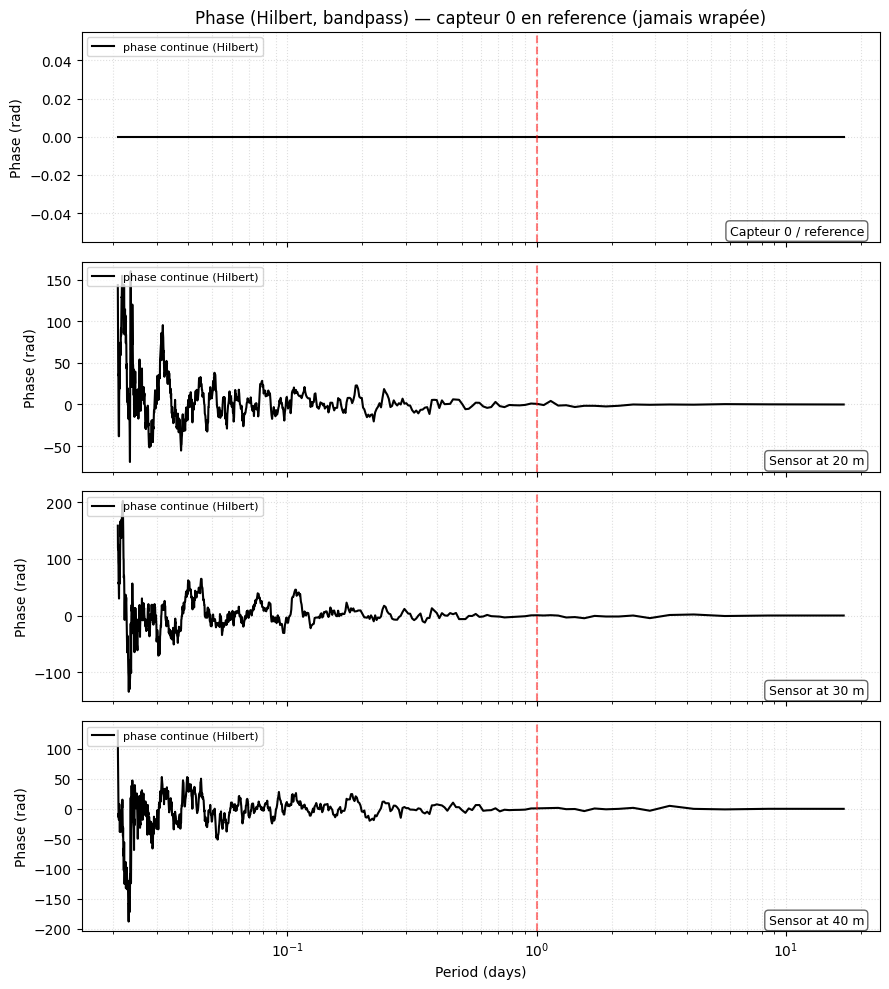

In [245]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, hilbert

# ------------------ helpers ------------------

def to_seconds(dates):
    return (dates - dates[0]).astype('timedelta64[s]').astype(np.float64)

def regularize(t, y):
    """Rééchantillonne sur une grille régulière (dt = médiane)."""
    t = np.asarray(t, float); y = np.asarray(y, float)
    m = np.isfinite(t) & np.isfinite(y)
    t = t[m]; y = y[m]
    dt = np.median(np.diff(t))
    if dt <= 0:
        raise ValueError("timestamps non croissants")
    tg = np.arange(t[0], t[-1] + 0.5*dt, dt)
    yg = np.interp(tg, t, y)
    return tg, yg, 1.0/dt

def butter_band(f0, fs, bw_frac=0.2, order=4):
    """Passe-bande centré f0, largeur relative bw_frac (par ex. 0.2 = ±10%)."""
    ny = fs/2
    fl = max(1e-8, f0*(1 - bw_frac/2))
    fh = min(ny*0.99, f0*(1 + bw_frac/2))
    if fl >= fh:
        raise ValueError(f"Bande invalide: fl={fl:.3e} >= fh={fh:.3e}")
    b, a = butter(order, [fl/ny, fh/ny], btype='band')
    return b, a

def analytic_signal(t, y, f0, bw_frac=0.2, order=4):
    """Filtrage bandpass puis signal analytique (complexe)."""
    tg, yg, fs = regularize(t, y)
    b, a = butter_band(f0, fs, bw_frac=bw_frac, order=order)
    yf = filtfilt(b, a, yg)                  # zéro-phase
    z = hilbert(yf)                           # signal analytique
    return tg, z, fs

def continuous_phase_from_complex(z):
    """
    Phase absolue continue SANS wrapping:
    phi[0]=0; phi[k+1]=phi[k] + arg( z[k+1]/z[k] ).
    """
    z = np.asarray(z, complex)
    # petites sécurités si amplitude quasi nulle :
    eps = 1e-12
    z_safe = np.where(np.abs(z) < eps, eps*np.exp(1j*np.angle(z+eps)), z)
    ratio = z_safe[1:] / z_safe[:-1]
    dphi = np.angle(ratio)        # incrément de phase local (petit, donc pas d'ambiguïté 2π)
    phi = np.zeros(len(z_safe))
    phi[1:] = np.cumsum(dphi)
    return phi

# ------------------ pipeline Hilbert par période ------------------

def phases_vs_period_hilbert(dates_mes, signals, period_days,
                             bw_frac=0.2, order=4):
    """
    Calcule la phase continue (jamais wrapée) RELATIVE à la rivière
    pour chaque signal et chaque période de 'period_days'.
    - dates_mes: array datetime64
    - signals: [river, z1, z2, z3, ...] (mêmes longueurs)
    - period_days: array-like des périodes à évaluer (jours)
    Retourne: phases_h (n_signals x n_periods), period_days_out
      où phases_h[i, j] = moyenne temporelle de la phase relative (signal i vs rivière) pour la période j.
      Pour i==0 (rivière), on met 0 par convention.
    """
    t = to_seconds(dates_mes)
    sensors = [np.asarray(s, float) for s in signals]
    n_signals = len(signals)
    periods = np.asarray(period_days, float)

    phases_h = np.zeros((n_signals, len(periods)), dtype=float)

    for j, Pd in enumerate(periods):
        P = Pd * 86400.0
        f0 = 1.0 / P

        # ref : capteur 0
        t_r, z_r, fs = analytic_signal(t, sensors[0], f0, bw_frac=bw_frac, order=order)
        phi_r = continuous_phase_from_complex(z_r)

        # pour chaque capteur : phase continue relative = phi_s - phi_r (interpolée sur t_r)
        for i, s in enumerate(sensors):  # inclut le capteur 0 pour index 0
            if i == 0:
                phases_h[i, j] = 0.0  # référence
                continue
            t_s, z_s, fs_s = analytic_signal(t, s, f0, bw_frac=bw_frac, order=order)
            phi_s = continuous_phase_from_complex(z_s)
            # aligne sur t_r
            phi_s_i = np.interp(t_r, t_s, phi_s)
            dphi = phi_s_i - phi_r        # phase relative continue (jamais wrapée)
            # moyenne temporelle simple (tu peux aussi prendre la médiane)
            phases_h[i, j] = np.mean(dphi)

    return phases_h, periods

# ------------------ exemple de tracé (remplace ton bloc) ------------------

# Entrées attendues déjà définies dans ton contexte :
# - dates_mes : array datetime64
# - signals   : [river, z1, z2, z3]
# - depth_sensors : profondeurs (pour étiquettes)
# - period_days   : les périodes à balayer (jours) -> si tu as déjà period_days, on l'utilise;
#   sinon crée-le, par ex. period_days = np.logspace(np.log10(0.3), np.log10(30), 100)


# calcule les phases "Hilbert, non wrapées" vs période :
phases_h, period_days_out = phases_vs_period_hilbert(
    dico['temperature']['dates'].values, signals, period_days,
    bw_frac=0.2,   # ±10% autour de f0
    order=4
)

n_signals, n_freqs = phases_h.shape

fig, axes = plt.subplots(n_signals, 1, figsize=(9, 2.5 * n_signals), sharex=True)
if n_signals == 1:
    axes = [axes]


for i in range(n_signals):
    ax = axes[i]
    ph = phases_h[i]  # déjà continue, sans wrap, sans rescaling
    ax.plot(period_days_out, ph, '-k', label='phase continue (Hilbert)')
    ax.set_xscale('log')
    ax.set_ylabel('Phase (rad)')
    if i == 0:
        ax.set_title('Phase (Hilbert, bandpass) — capteur 0 en reference (jamais wrapée)')
        label = "Capteur 0 / reference"
    else:
        depth_label = depth_sensors[i] if i < len(depth_sensors) else f"idx {i}"
        label = f"Sensor at {depth_label} m"
    ax.text(0.98, 0.02, label, transform=ax.transAxes, ha='right', va='bottom', fontsize=9,
            bbox=dict(boxstyle='round', fc='white', alpha=0.6))

    for pday in input_periods_days:
        ax.axvline(pday, color='r', linestyle='--', alpha=0.5)

    #ax.set_xlim(0.2, 10)

    ax.grid(True, which='both', ls=':', alpha=0.4)
    ax.legend(loc='upper left', fontsize=8)

axes[-1].set_xlabel('Period (days)')
plt.tight_layout()
plt.show()

Extracting phase values

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt, hilbert

def _to_seconds(dates):
    return (dates - dates[0]).astype('timedelta64[s]').astype(float)

def _regularize(t, y):
    t = np.asarray(t, float); y = np.asarray(y, float)
    m = np.isfinite(t) & np.isfinite(y)
    t, y = t[m], y[m]
    dt = np.median(np.diff(t))
    tg = np.arange(t[0], t[-1] + 0.5*dt, dt)
    yg = np.interp(tg, t, y)
    return tg, yg, 1.0/dt

def _butter_band(f0, fs, bw_frac=0.15, order=4):
    ny = fs/2
    fl = max(1e-8, f0*(1 - bw_frac/2))
    fh = min(ny*0.99, f0*(1 + bw_frac/2))
    b, a = butter(order, [fl/ny, fh/ny], btype='band')
    return b, a

def _analytic_bandpassed(t, y, f0, bw_frac=0.15, order=4):
    tg, yg, fs = _regularize(t, y)
    b, a = _butter_band(f0, fs, bw_frac=bw_frac, order=order)
    yf = filtfilt(b, a, yg)               # zéro-déphasage
    z = hilbert(yf)                        # signal analytique
    return tg, z

def _circ_mean(ph):
    # moyenne circulaire : angle de la moyenne des exponentielles
    return np.angle(np.mean(np.exp(1j*ph)))

def phases_at_input_periods_circular(dates_mes, signals, depth_sensors, input_periods_days,
                                     bw_frac=0.15, order=4, amp_thresh=None):
    """
    Phase relative (mod 2π) par *période d'intérêt*:
      - filtre passe-bande
      - phase instantanée Δφ(t) = arg(z_s * conj(z_r))
      - moyenne circulaire dans le temps
      - unwrap le vecteur obtenu le long des profondeurs (par période)
    Retourne un DataFrame (lignes = périodes, colonnes = rivière + profondeurs).
    """
    t = _to_seconds(dates_mes)
    sensors = [np.asarray(s, float) for s in signals]
    zdepths = np.asarray(depth_sensors, float)

    rows = []
    for Pd in input_periods_days:
        f0 = 1.0 / (Pd * 86400.0)

        # signal analytique filtré (capteur 0)
        tr, zr = _analytic_bandpassed(t, sensors[0], f0, bw_frac=bw_frac, order=order)

        phases_rel = [0.0]  # 0 pour la référence
        for s in sensors[1:]:
            ts, zs = _analytic_bandpassed(t, s, f0, bw_frac=bw_frac, order=order)

            # aligner temporellement
            # on interpole le complexe (OK sur petites dérives)
            zs_i = np.interp(tr, ts, zs.real) + 1j*np.interp(tr, ts, zs.imag)

            # option: rejeter les instants à faible amplitude (SNR faible)
            if amp_thresh is not None:
                m = (np.abs(zr) > amp_thresh) & (np.abs(zs_i) > amp_thresh)
                if m.sum() < 10:
                    phases_rel.append(np.nan)
                    continue
                dphi_t = np.angle(zs_i[m] * np.conj(zr[m]))
            else:
                dphi_t = np.angle(zs_i * np.conj(zr))

            phi_hat = _circ_mean(dphi_t)     # dans (-π, π]
            phases_rel.append(phi_hat)

        # unwrap cohérent le long des profondeurs (pour cette période)
        ph = np.array(phases_rel, float)               # [z0, z1, z2, ...]
        ph_unw = np.unwrap(ph)                         # continu en profondeur
        # convention physique: retard => négatif; force dans la branche ≤ 0
        # (on autorise un décalage de ±2π pour rendre tout ≤ 0 et monotone)
        for k in range(1, len(ph_unw)):
            while ph_unw[k] > ph_unw[k-1]:
                ph_unw[k] -= 2*np.pi

        rows.append([Pd] + ph_unw.tolist())

    cols = [f"Capteur 0 (ref) à {zdepths[0]:.2f}"] + [f"{z:.2f} m" for z in zdepths[1:]]
    df = pd.DataFrame(rows, columns=["Period (days)"] + cols).set_index("Period (days)")
    return df

In [ ]:
df_phase = phases_at_input_periods_circular(
    dates_mes=dico['temperature']['dates'].values,
    signals=signals,                   # [z0, z1, z2, z3]
    depth_sensors=depth_sensors[:3],
    input_periods_days=input_periods_days,   # périodes (jours)
    bw_frac=0.15, order=4,
    amp_thresh=None   # mets p.ex. amp_thresh=np.percentile(np.abs(hilbert(river)), 20) pour être plus strict
)
print(df_phase.round(3))

ValueError: 4 columns passed, passed data had 5 columns

KeyboardInterrupt: 